이산형 확률분포

In [1]:
# 1차원 이산확률분포
import numpy as np
import matplotlib.pyplot as plt

x_set = np.array([1,2,3,4,5,6])

def f(x):
    if x in x_set:
        return x/21
    else:
        return 0
X = [x_set,f]

In [2]:
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
dict(zip(x_set, prob))

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

<BarContainer object of 6 artists>

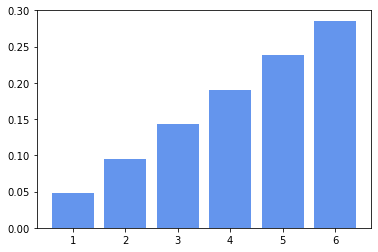

In [19]:
import seaborn as sns
# sns.barplot(x_set,prob)
plt.bar(x_set,prob,color='cornflowerblue')

In [20]:
np.all(prob>=0)

True

In [21]:
np.sum(prob)

0.9999999999999999

In [24]:
# 누적분포함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <=x])

In [26]:
F(6)

0.9999999999999999

In [27]:
# 확률변수의 변환 : 확률변수 X에 2를 곱하고 3을 더한 2X + 3도 확률변수가 된다.
y_set = np.array([2*x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [53]:
# 1차원 이산형 확률변수의 지표
# 평균 : 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되며 기댓값이라고도 부른다.
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [52]:
# 확률변수의 기댓값 은 확률변수를 무제한 시행하여 얻은 실현값의 평균
sample = np.random.choice(x_set,int(1e6),p=prob)
np.mean(sample)

4.332865

In [64]:
# 일반화
def E(X, g=lambda x:x):
    x_set, f=X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])


In [65]:
E(X)

4.333333333333333

In [66]:
E(X,g=lambda x:2*x+3)

11.666666666666664

In [67]:
# 기댒값의 선형성
2 * E(X) + 3

11.666666666666666

In [72]:
# 분산 
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [73]:
# 일반화
def V(X, g=lambda x:x):
    x_set,f = X
    mean = E(X,g)
    return np.sum([(g(i)-mean)**2 * f(i) for i in x_set])

In [74]:
V(X)

2.2222222222222223

In [76]:
V(X, lambda x:2*x+3)

8.88888888888889

In [77]:
# 분산의 공식
2**2*V(X)

8.88888888888889

In [78]:
# 2차원 이산형 확률분포
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [89]:
def f_XY(x,y):
    if 1 <= y <= 6 and 1 <= x-y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [81]:
XY = [x_set, y_set, f_XY]

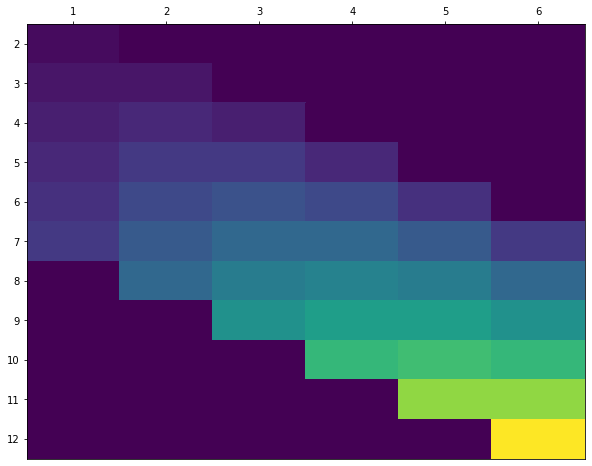

In [96]:
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0])+0.5, minor=False)
ax.set_xticklabels(np.arange(1,7),minor=False)
ax.set_yticklabels(np.arange(2,13),minor=False)

# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다.
ax.invert_yaxis()

# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()